In [1]:
import pandas as pd

from relative_path import PATH_DATA, PATH_OUTPUT_DATA, PATH_OUTPUT_GRAPH, PATH_OUTPUT_PROF
from relative_path import TRACK_DATA, ARTIST_DATA, FEATURE_COLS, PROCESSED_FEATURE_DATA

from pandas import DataFrame, Series
from typing import List, Dict

from data_preprocessing import isolate_columns, preprocess_df

import seaborn as sns

## Standard

In [2]:
df_tracks =     pd.read_parquet(TRACK_DATA)
df_artists =    pd.read_parquet(ARTIST_DATA)

# Separate the main criterias from its features.
dfp_tracks, dfp_features = isolate_columns(df_tracks, FEATURE_COLS)

In [3]:
# Preprocess Dataframe - sorting and re-indexing
dfp_tracks = preprocess_df(dfp_tracks, sort_by="popularity")
dfp_artists = preprocess_df(df_artists, sort_by="popularity")

# Rename column
dfp_tracks.rename(columns = {"id":"track_id", "name":"track_name", "popularity": "track_popularity", "artists":"artist_name", "id_artists":"artist_id"}, inplace=True)
dfp_artists.rename(columns = {"id":"artist_id", "name":"artist_name", "popularity": "artist_popularity", "followers":"artist_followers"}, inplace=True)
dfp_features.rename(columns = {"id":"track_id"}, inplace=True)

In [4]:
# Checking and processing the DATATYPES. 
dfp_tracks["dates"] = pd.to_datetime(dfp_tracks["release_date"])
dfp_tracks["release_date"] = pd.to_datetime(dfp_tracks["release_date"])
dfp_tracks["year"]=dfp_tracks["release_date"].dt.year

dfp_tracks.drop(['release_date', 'dates'], axis=1, inplace=True)

In [5]:
# Process Data - Remove popularity values that less than 20. Too much data - distorts the distribution. 
#dfp_tracks = dfp_tracks[dfp_tracks["track_popularity"] >= 20]
#dfp_artists = dfp_artists[dfp_artists["artist_popularity"] >= 20]

In [6]:
dfp_tracks.head(3)

,track_id,track_name,track_popularity,duration_ms,artist_name,artist_id,year
0,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021
1,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021
2,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021


In [7]:
dfp_artists.head(3)

,artist_id,artist_followers,genres,artist_name,artist_popularity
0,1uNFoZAHBGtllmzznpCI3s,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",Justin Bieber,100
1,4q3ewBCX7sLwd24euuV69X,32244734.0,"['latin', 'reggaeton', 'trap latino']",Bad Bunny,98
2,06HL4z0CvFAxyc27GXpf02,38869193.0,"['pop', 'post-teen pop']",Taylor Swift,98


In [8]:
### Track Dataframe
# Track Popularity over time / year - distribution, boxplot. (Render the top 10, 100 and 1000, )
# Extract - Top solo artists vs Top various artists

### Artists Dataframe
# Artist Popularity over Artist Followers
# Frequency of genres, relative to the top artist. (Top 10% and Top 25%, Top 10 and 100)


###  Combination of Track and Artists Dataframe
# Track Popularity over Total Artists Followers, Track Popularity over Average Artists Popularity

In [16]:
import matplotlib.pyplot as plt

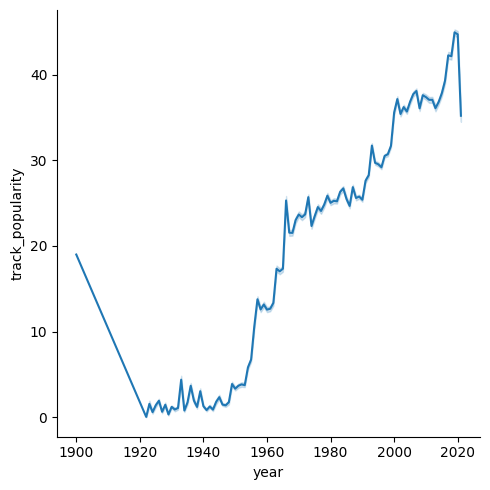

In [23]:
#plt.figure(figsize=(16,10), dpi=720)
sns.relplot(x="year", y="track_popularity", 
            data=dfp_tracks, kind="line")

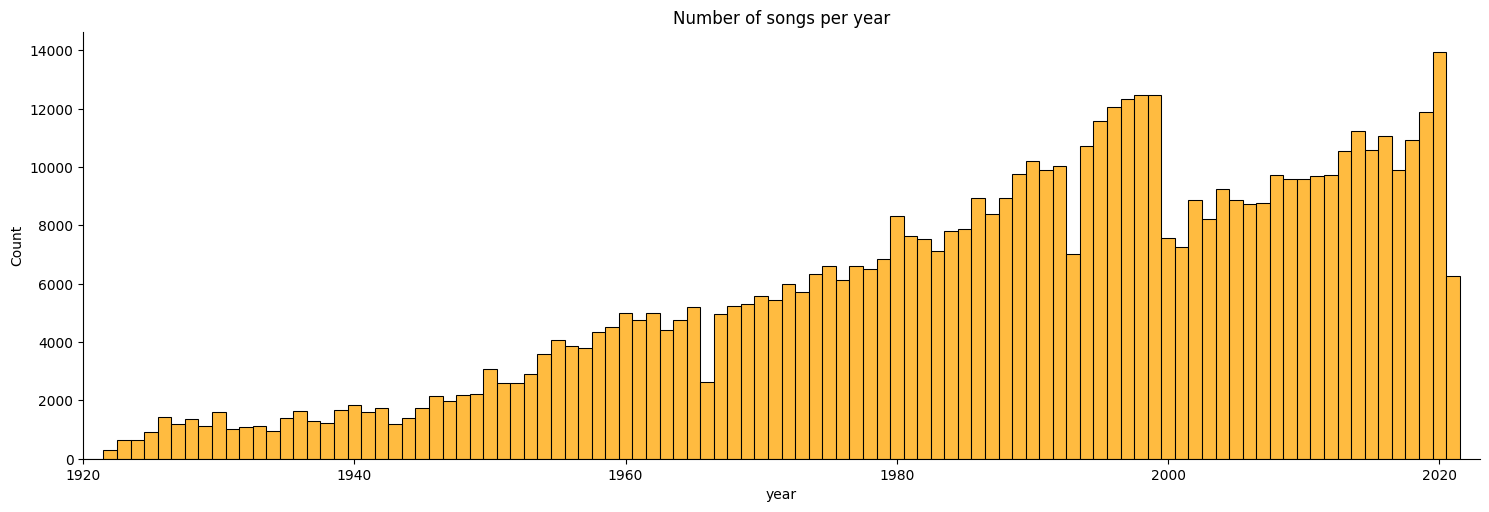

In [13]:
sns.displot(dfp_tracks["year"], discrete=True, aspect=3, height=5, kind='hist',color='orange').set(title='Number of songs per year', xlim=(1920,2023))

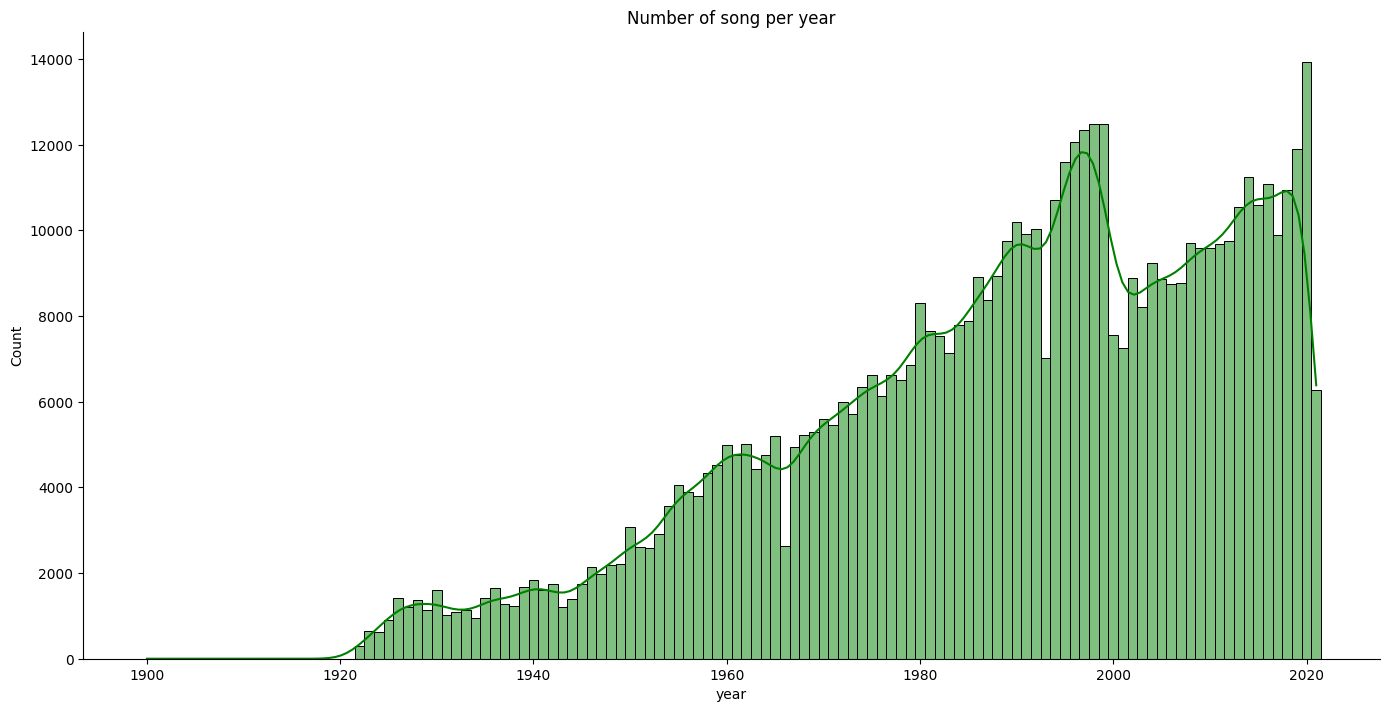

In [10]:
sns.displot(dfp_tracks["year"], discrete = True, aspect = 2, height = 7, kind = "hist", kde = True, color = 'green').set(title="Number of song per year")